# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.isna().sum()
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_4_SCORE*

How many years of data are logged in our dataset? 

In [13]:
print(df["YEAR"].unique())
min = min(df["YEAR"])
max = max(df["YEAR"])
max - min

[1992 2000 2003 2005 2007 2009 2011 2013 2015 2017 1990 1996 2019]


29

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [25]:
states = df.groupby("STATE")
print(states["AVG_MATH_4_SCORE"].mean())
print("Michigan")

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your outcome score across all states in 2019

In [26]:
df["YEAR"] == 2019

0       False
2       False
3       False
4       False
5       False
        ...  
1710     True
1711     True
1712     True
1713     True
1714     True
Name: YEAR, Length: 565, dtype: bool

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [35]:
df.groupby(["YEAR", "STATE"])["AVG_MATH_4_SCORE"].max()

YEAR  STATE        
1990  NATIONAL         213.0
1992  ALABAMA          208.0
      ARIZONA          215.0
      ARKANSAS         210.0
      CALIFORNIA       208.0
                       ...  
2019  VIRGINIA         247.0
      WASHINGTON       240.0
      WEST_VIRGINIA    231.0
      WISCONSIN        242.0
      WYOMING          246.0
Name: AVG_MATH_4_SCORE, Length: 565, dtype: float64

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [74]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df.isna().sum()
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

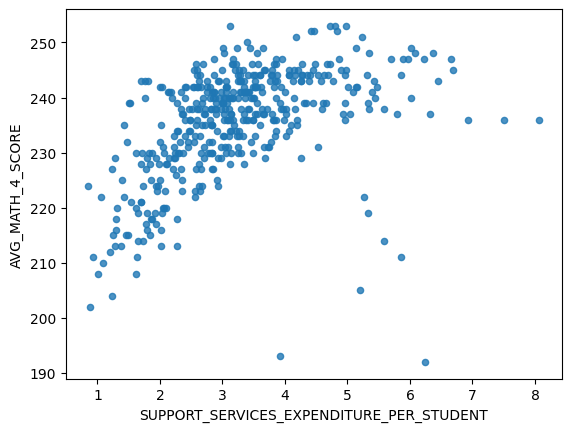

In [67]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.8)

**<We are looking for a relationship between the Support Severices Expenditure per student against the Averge Math Score of the 4th grade. We can see that there may be a positive correlation between the 2 variables.>**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

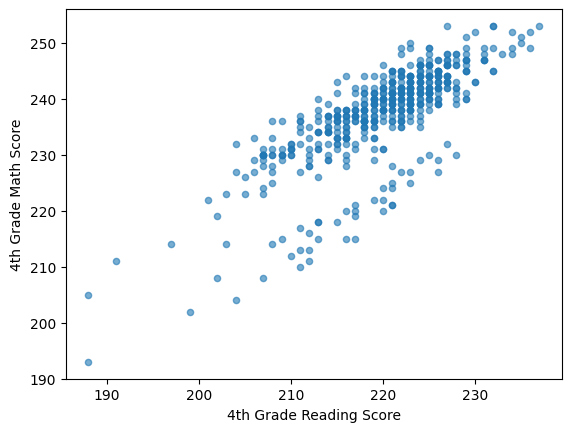

In [68]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

**<Visualization of 4th Grade Math Scores and State Revenue. We are looking for a relationship between the average 4th Grade Reading scores and the average 4th Grade Math Scores. We can see that there may be a positive correlation between the 2 variables.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df[['ENROLL_4','AVG_READING_4_SCORE','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [71]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [72]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [73]:
# create your model here
# model = 
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.5322168205491941

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [58]:
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

-0.7729341616690071
4.246137700243361
5.313108611504972


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

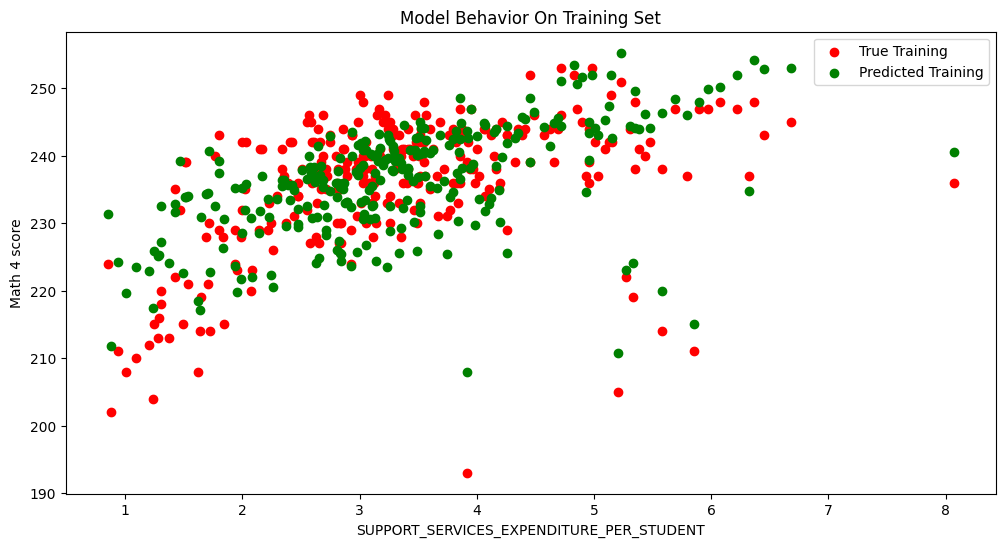

In [65]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

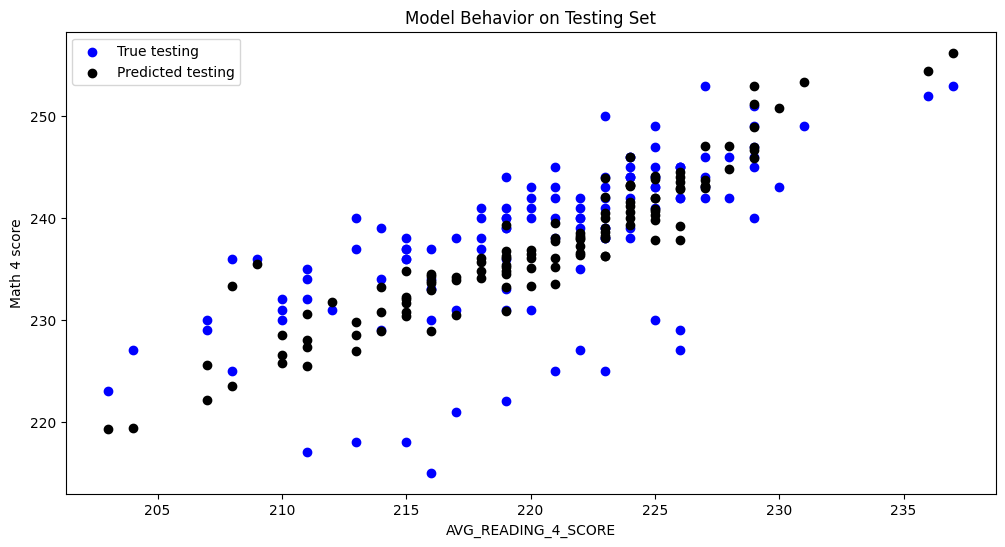

In [64]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<It seems that the training model works good for each testing set. However, for the Test and Training sets of the average reading score of the 4th graders, there seems to be either outliers between 210 and 225. It could also be that our testing does not account well for the true testing values. We can see that the predictor of Support Services has accurate testing values. Therefore we see that our pedictors can help us find the scores of the Average 4th grade Math score. \>**